## q-2
Implement Ridge regression also known as L2 regularisation and plot graph between
regularisation coefficient λ and error

In [14]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
np.seterr(divide='ignore', invalid='ignore')

from pylab import *
import matplotlib
import matplotlib.pyplot as plt

###### loading dataset and preprocessing

In [2]:
df = pd.read_csv("../input_data/AdmissionDataset/data.csv")
X = df.drop(['Serial No.','Chance of Admit '],axis=1)
Y = df['Chance of Admit ']
col_names = [i for i in X]
X = pd.DataFrame(preprocessing.scale(X), columns = col_names)

/home/priyendu/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


###### splitting data in training and validation

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

###### using inbuilt linear regression model

In [4]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=0.01,max_iter=1000)
clf.fit(X_train, Y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=None, solver='auto', tol=0.001)

###### appending a column of ones at the beginning

In [5]:
X_train1 = X_train.reset_index(drop=True)
Y_train1 = Y_train.reset_index(drop=True)

ones = pd.DataFrame(1,index=np.arange(X_train.shape[0]),columns=["ones"])
X_train1 = pd.concat([ones, X_train1],axis=1)
X_train1 = np.array(X_train1)
Y_train1 = np.array(Y_train1).reshape(X_train1.shape[0],1)

###### initializing parameters for gradient descent

In [6]:
theta = np.zeros([1,8])
alpha = 0.01
iterations = 1000

###### method to calculate values of theta using gradient descent

In [7]:
costs = []
def gradientDescent(X,Y,theta,it,alpha,lamb):
    for i in range(it):
        theta = theta - (alpha/len(X)) * np.sum(X * (np.matmul(X, theta.T) - Y) + lamb*theta*2, axis=0) 
    return theta

lamb = 0.01
g = gradientDescent(X_train1,Y_train1,theta,iterations,alpha,lamb)
theta_list = g[0]

In [8]:
print theta_list

print(clf.intercept_)  
print(clf.coef_)

[0.70749524 0.02806014 0.02116218 0.00607346 0.00334945 0.01448738
 0.06099442 0.01094184]
0.721908795130022
[0.02644579 0.01488674 0.00736343 0.00031088 0.01240746 0.07269937
 0.01040366]


###### method to predict values for test_data

In [9]:
def predict(X_test):
    Y_pred=[]
    for index,row in X_test.iterrows():
        row=list(row)
        y1=0
        for i in range(1,8):
            y1=y1+theta_list[i]*row[i-1]
        y1=y1+theta_list[0]
        Y_pred.append(y1)
    return Y_pred
pred = predict(X_test)

In [10]:
# print theta_list
# print r2_score(list(Y_test),pred)

In [11]:
lamb = 0.01
lamb_list = []
train_error = []
test_error = []
sys_train_error = []
sys_test_error = []
while lamb < 1:
#     print lamb
    theta = np.zeros([1,8])
    g = gradientDescent(X_train1,Y_train1,theta,iterations,alpha,lamb)
    theta_list = g[0]
    
    clf = Ridge(alpha=lamb,max_iter=1000)
    clf.fit(X_train, Y_train)
#     print "============================================================="
#     print theta_list

#     print(clf.intercept_)  
#     print(clf.coef_)
#     print "============================================================="
    
    pred = clf.predict(X_test)
    sys_test_err = mean_squared_error(Y_test, pred)
    sys_test_error.append(sys_test_err)
    
    pred = clf.predict(X_train)
    sys_train_err = mean_squared_error(Y_train, pred)
    sys_train_error.append(sys_train_err)
    
    pred = predict(X_test)
#     print pred
    test_err = mean_squared_error(Y_test, pred)
    test_error.append(test_err)
    
    pred = predict(X_train)
    train_err = mean_squared_error(Y_train, pred)
    train_error.append(train_err)
    
    lamb_list.append(lamb)
    lamb+=0.01
    
    
print len(lamb_list)
print len(test_error)
print len(train_error)

99
99
99


system : lambda vs error


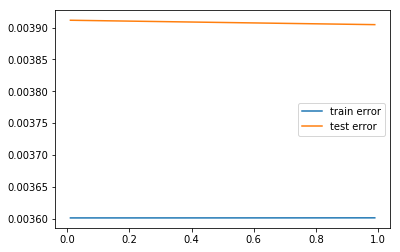

In [12]:
plt.plot(lamb_list, sys_train_error, label="train error")
plt.plot(lamb_list, sys_test_error, label="test error")
plt.legend()
print "system : lambda vs error"
plt.show()

my model : lambda vs error


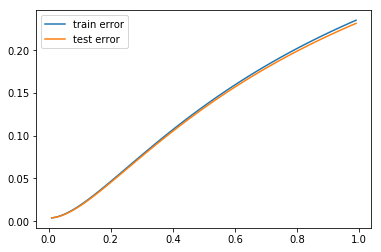

In [13]:
plt.plot(lamb_list, train_error, label="train error")
plt.plot(lamb_list, test_error, label="test error")
plt.legend()
print "my model : lambda vs error"
plt.show()

###### testing from file